<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 9 Problem 1
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part (a)

Let $\alpha=0.784$ be the fraction of CO$_{2}$ recovered from the feed gas stream into the _liquid_ solvent. 
Therefore, 
\begin{align}
    Y_{1}V^{\prime}	&=	\left(1-\alpha\right)Y_{N+1}V^{\prime} \\
    Y_{1}	&=	\left(1-\alpha\right)Y_{N+1}. \label{eq:co2-Y1}
\end{align}
From a mole balance on the CO$_{2}$ we have 
\begin{equation}
    \label{eq:co2-mole-bal}
    X_{0}L^{\prime} + Y_{1}V^{\prime} = Y_{n+1}V^{\prime}+X_{n}L^{\prime} 
\end{equation}
for arbitrary stage $n$. 
After substituting \eqref{eq:co2-Y1}, \eqref{eq:co2-mole-bal} simplifies to
\begin{align}
    X_{0} L^{\prime} + \left( 1 - \alpha \right) Y_{N+1} V^{\prime}	&=	Y_{n+1} V^{\prime} + X_{n} L^{\prime}, \\
    Y_{n+1}	&=	\left( X_{n} - X_{0} \right) \frac{L^{\prime}}{V^{\prime}} + \left( 1 - \alpha \right) Y_{N+1} \label{eq:co2-operating-line}
\end{align}
which is the operating line. However, in this case we do not know $\frac{L^{\prime}}{V^{\prime}}$ - we only know the number of stages, $N$. 
Therefore, we do the following:
  1. Guess $\frac{L^{\prime}}{V^{\prime}}$.
  2. From $Y_{1}$ obtained from \eqref{eq:co2-Y1}, determine $X_{1}$ by interpolating in the data given.
  3. From $X_{1}$, use \eqref{eq:co2-operating-line} with the guessed value of $\frac{L^{\prime}}{V^{\prime}}$ to obtain $Y_{2}$. Repeat these two steps up to $Y_{7}$
  4. See if $Y_{7}$ is equal to the desired value. If not, then return to step 1.

In [2]:
alpha = 0.784  # Fraction CO2 recovered from feed into solvent

# feed gas:
ynp1 = 0.1
YNP1 = ynp1/(1-ynp1)

# feed liquid:
X0 = 0.04  # mole CO2 / mol amine

# exit vapor:
Y1 = (1-alpha)*YNP1


# equilibrium data
Y = np.array([ 0.003, 0.008, 0.015, 0.023, 0.032, 0.043, 0.055, 0.068, 0.083, 0.099, 0.12 ])
X = np.array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.10,  0.11 ])



Target Y6 = 0.1111
actual Y6 = 0.1111
L'/V' = 1.8524
# stages = 6



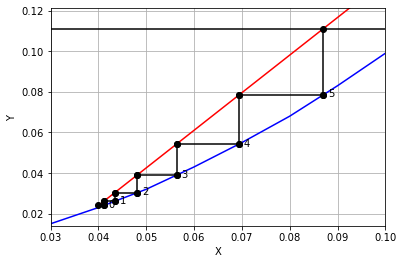

In [3]:
#---------------------------------------------------
# operating line slope (L'/V')
# CHANGE THIS NUMBER UNTIL CONVERGENCE IS ACHIEVED!
slope = 1.852355
#---------------------------------------------------

# operating line
Xop = np.linspace(X0,max(X))
Yop = (Xop-X0)*slope + Y1

plt.plot(X,Y,'b-')
plt.plot(Xop,Yop,'r-')
plt.plot(X, YNP1*np.ones_like(X),'k-')
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([X0-0.01,0.1,Y1-0.01,YNP1+0.01])


# plot up stage results.  This is a bit tricky.
nstage = 6
Xstage = np.zeros(nstage+1)
Ystage = np.zeros_like(Xstage)
Xstage[0] = X0
Ystage[0] = Y1

for i in range(0,nstage):

    # liquid leaving stage i
    Xstage[i+1] = np.interp(Ystage[i],Y,X)

    # vapor entering stage i from i+1
    Ystage[i+1] = ( Xstage[i+1] - X0 ) * slope + Y1

    plt.plot([Xstage[i+1],Xstage[i+1]], [Ystage[i],Ystage[i+1]],'ko-')
    plt.plot([Xstage[i],Xstage[i+1]],[Ystage[i],Ystage[i]],'ko-')
    plt.text(Xstage[i+1]+0.001,Ystage[i]-0.001,str(i))

    
plt.axis([X0-0.01,0.1,Y1-0.01,YNP1+0.01])

print('\n\nTarget Y{:d} = {:.4f}'.format(nstage,YNP1))
print('actual Y{:d} = {:.4f}'.format(nstage,Ystage[-1]))
print('L\'/V\' = {:.4f}'.format(slope))
print('# stages = {:d}\n'.format(nstage))

plt.show()

The figure above shows the results of this procedure after $\frac{L^{\prime}}{V^{\prime}}$ has converged.

Below is some other information from this process:

In [4]:
print('vapor mole RATIO    leaving stage 1: Y1 = {:.3f}'.format(Ystage[0]))
print('vapor mole FRACTION leaving stage 1: y1 = {:.3f}\n'.format(Ystage[0]/(1+Ystage[0]) ))


vapor mole RATIO    leaving stage 1: Y1 = 0.024
vapor mole FRACTION leaving stage 1: y1 = 0.023



Here are the conditions at the bottom of the column:

In [5]:
print('\nMole RATIOS at the bottom of the column:')
print('\tX{:d} = {:.3f}'.format(nstage,Xstage[-1]))
print('\tY{:d} = {:.3f}'.format(nstage+1,Ystage[-1]))

print('\nMole FRACTIONS at the bottom of the column:')
print('\tx{:d} = {:.3f}'.format(nstage,Xstage[-1]/(1+Xstage[-1])))
print('\ty{:d} = {:.3f}\n'.format(nstage+1,Ystage[-1]/(1+Ystage[-1])))



Mole RATIOS at the bottom of the column:
	X6 = 0.087
	Y7 = 0.111

Mole FRACTIONS at the bottom of the column:
	x6 = 0.080
	y7 = 0.100



# Part (b)

We need $\frac{L}{V}$ (moles amine solution per mole of feed gas), not $\frac{L^{\prime}}{V^{\prime}}.$ 
For the gas feed, 
\begin{align}
    V	&=	V^{\prime}+Y_{7}V^{\prime}, \nonumber \\
    V^{\prime}	&=	\frac{V}{Y_{7}+1}. 
\end{align}
Similarly, for the amine solution, 
\begin{align}
    L	&=	L^{\prime}+X_{0}L^{\prime} \nonumber \\
    L^{\prime}	&=	\frac{L}{X_{0}+1}
\end{align}
Substituting these equations for $L^{\prime}$ and $V^{\prime}$, we find 
\begin{align*}
    \frac{L^{\prime}}{V^{\prime}}	&=	\frac{L}{V}\frac{Y_{7}+1}{X_{0}+1} \\
    \frac{L}{V}	&=	\frac{L^{\prime}}{V^{\prime}}\frac{X_{0}+1}{Y_{7}+1}
\end{align*}

In [6]:
print('\nL/V = {:.3f}\n'.format(slope*(1+Xstage[0])/(1+Ystage[-1])))


L/V = 1.734

